# Sensitivity, ROC, Optimal Sensitivity, Hyperparameter Tuning, improving the perforance of model

In [117]:
import pandas as pd
import numpy as np
credit = pd.read_csv("C:/Users/Administrator/Downloads/credit-default.csv") 

In [118]:
credit_dummies = pd.get_dummies(credit.drop('default', axis=1))
credit_dummies['default'] = credit['default']

from sklearn.model_selection import train_test_split

train, test = train_test_split(credit_dummies, test_size = 0.3, random_state=100)

In [119]:
train_x = train.drop('default', axis=1)
train_y = train['default']
test_x = test.drop('default', axis=1)
test_y = test['default']

In [120]:
from sklearn.ensemble import RandomForestClassifier
m2 = RandomForestClassifier(random_state=100)
m2.fit(train_x, train_y)
test_pred = m2.predict(test_x)

In [121]:
df = pd.DataFrame({'actual':test_y,'predicted':test_pred})

In [122]:
df['stat'] = df['actual'] == df['predicted']

In [123]:
df['stat'].value_counts()/ df.shape[0]*100

True     76.0
False    24.0
Name: stat, dtype: float64

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, test_pred)

array([[200,  19],
       [ 53,  28]], dtype=int64)

In [125]:
probs = pd.DataFrame(m2.predict_proba(test_x),columns=['Neg_1','Pos_2'])

In [126]:
probs.head()

,Neg_1,Pos_2
0,0.5,0.5
1,0.1,0.9
2,0.7,0.3
3,0.3,0.7
4,0.6,0.4


In [127]:
cut_off = 0.3
test_pred = probs['Pos_2'].apply(lambda v: 2 if v> cut_off else 1)
import secrets

In [128]:
d1 = secrets.model_testing(test_y, test_pred)
round((d1['Sensitivity']+d1['Specificity'])/2, 1)

0    67.9
dtype: float64

In [129]:
d1

,Accuracy,Sensitivity,Specificity
0,69.0,65.432099,70.319635


In [130]:
import numpy as np

cut_offs = []
tpr = []
fpr = []

for cut_off in np.linspace(0,1,22):
    test_pred = probs['Pos_2'].apply(lambda v: 2 if v> cut_off else 1)
    tn,fp,fn,tp = confusion_matrix(test_y, test_pred, labels=[1,2]).ravel()
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    cut_offs.append(cut_off)
    tpr.append(sensitivity)
    fpr.append(1-specificity)

dfg = pd.DataFrame({'cut_off':cut_offs,'sensitivity':tpr,'specificity':fpr})  # just for understanding
dfg['avg'] = ((0.6*dfg['sensitivity']) + (0.4 * dfg['specificity']))/2
dfg.head()

,cut_off,sensitivity,specificity,avg
0,0.000000,0.950617,0.86758,0.458701
1,0.047619,0.950617,0.86758,0.458701
2,0.095238,0.950617,0.86758,0.458701
3,0.142857,0.901235,0.66210,0.402790
4,0.190476,0.901235,0.66210,0.402790


In [131]:
import matplotlib.pyplot as plt

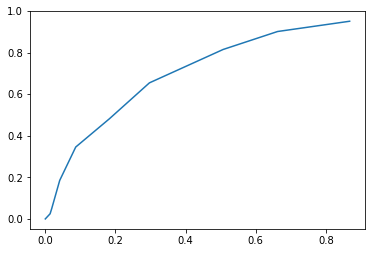

In [132]:
plt.plot(fpr, tpr)

# There is in-built function for ROC curve

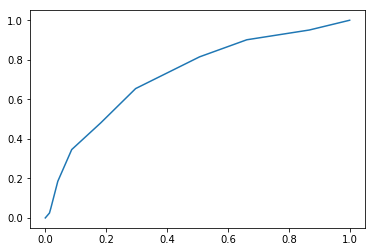

In [133]:
from sklearn.metrics import roc_curve
fpr, tpr, cutoffs = roc_curve(test_y, probs['Pos_2'], pos_label=2)
plt.plot(fpr,tpr)

In [137]:
df_roc = pd.DataFrame({'cutoff':cutoffs,
                      'fpr':fpr,
                      'tpr':tpr,
                      'specificity':1-fpr})
df_roc['youden_index'] = df_roc['tpr'] + df_roc['specificity'] - 1
df_roc.sort_values(by='youden_index', ascending=False).head(1)

,cutoff,fpr,specificity,tpr,youden_index
6,0.4,0.296804,0.703196,0.654321,0.357517


In [139]:
test_pred_new = probs['Pos_2'].apply(lambda v: 2 if v>0.4 else 1)

In [143]:
test_pred_new.head()

0    2
1    2
2    1
3    2
4    1
Name: Pos_2, dtype: int64

Random Forest AUC: 0.75
AdaBoost AUC: 0.74


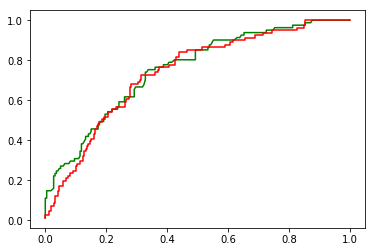

In [146]:
from sklearn.metrics import roc_auc_score, auc
model1 = RandomForestClassifier(random_state=100, n_estimators=1000)       # AUC: Area Under Curve
model1.fit(train_x, train_y)
probs1 = pd.DataFrame(model1.predict_proba(test_x),
                     columns=['Neg_1','Pos_2'])
fpr, tpr, cutoffs = roc_curve(test_y,probs1['Pos_2'], pos_label=2)
auc_rf = auc(fpr, tpr)
plt.plot(fpr,tpr, color='green')

print('Random Forest AUC: %.2f' % auc_rf)
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier(random_state=100)
model2.fit(train_x, train_y)
probs2 = pd.DataFrame(model2.predict_proba(test_x),
                     columns=['Neg_1','Pos_2'])
fpr, tpr, cutoffs = roc_curve(test_y,probs2['Pos_2'], pos_label=2)
auc_ada = auc(fpr, tpr)
plt.plot(fpr,tpr, color='red')

print('AdaBoost AUC: %.2f' % auc_ada)



# Model performance on HR dataset

In [147]:
import numpy as np
import pandas as pd
hr = pd.read_csv('D:/Downloaded rcodes and datasets/HR Analytics.csv')

In [161]:
hr_dummies = pd.get_dummies(hr.drop('Attrition', axis=1))
hr_dummies['Attrition'] = hr['Attrition']
from sklearn.model_selection import train_test_split
train, test = train_test_split(hr_dummies, test_size = 0.3, random_state = 100)
train_x = train.drop('Attrition',axis=1) 
train_y = train['Attrition']
test_x = test.drop('Attrition',axis=1)
test_y = test['Attrition']

Decision Tree AUC: 0.56
Random Forest AUC: 0.56
AdaBoost AUC: 0.73


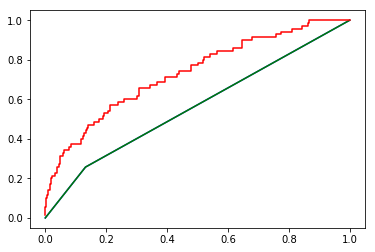

In [168]:
from sklearn.tree import DecisionTreeClassifier
m1 = DecisionTreeClassifier(random_state=100)
m1.fit(train_x, train_y)
probs1 = pd.DataFrame(m1.predict_proba(test_x),
                     columns=['Neg_1','Pos_2'])
fpr, tpr, cutoffs = roc_curve(test_y,probs1['Pos_2'], pos_label=1)
auc_dt = auc(fpr, tpr)
plt.plot(fpr,tpr, color='blue')

print('Decision Tree AUC: %.2f' % auc_dt)

from sklearn.metrics import roc_auc_score, auc
m2 = RandomForestClassifier(random_state=100, n_estimators=1000)       # AUC: Area Under Curve
m2.fit(train_x, train_y)
probs2 = pd.DataFrame(m2.predict_proba(test_x),
                     columns=['Neg_1','Pos_2'])
fpr, tpr, cutoffs = roc_curve(test_y,probs1['Pos_2'], pos_label=1)
auc_rf = auc(fpr, tpr)
plt.plot(fpr,tpr, color='green')

print('Random Forest AUC: %.2f' % auc_rf)
from sklearn.ensemble import AdaBoostClassifier
m3 = AdaBoostClassifier(random_state=100)
m3.fit(train_x, train_y)
probs3 = pd.DataFrame(m3.predict_proba(test_x),
                     columns=['Neg_1','Pos_2'])
fpr, tpr, cutoffs = roc_curve(test_y,probs3['Pos_2'], pos_label=1)
auc_ada = auc(fpr, tpr)
plt.plot(fpr,tpr, color='red')
print('AdaBoost AUC: %.2f' % auc_ada)